In [1]:
#### Load the libraries 
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option("display.max_rows", None, "display.max_columns", None)

### Read in the data

In [2]:
# data from Australian team

sydney = pd.read_excel('G:\\29 Data Analytics\\Commercial research projects\\MS\\ESG project\\Australia\\Sydney and Melbourne deals - July 2021.xlsx'
                       , 'Sydney deals') # Sydney sheet

melbourne = pd.read_excel('G:\\29 Data Analytics\\Commercial research projects\\MS\\ESG project\\Australia\\Sydney and Melbourne deals - July 2021.xlsx'
                       , 'Melbourne CBD deals') # Melbourne sheet

In [3]:
#sydney.head()

In [4]:
# remove non-columns from the datasets
sydney = sydney.loc[:,~sydney.columns.str.contains('Unnamed')] 
melbourne = melbourne.loc[:,~melbourne.columns.str.contains('Unnamed')] 

In [5]:
# compare column names, Sale Date vs Date
sydney.columns
melbourne.columns

Index(['Grade', 'Prime/Secondary', 'Sold (%)', 'Sale Date', 'Building Name',
       'Address', 'Suburb', 'Market', 'Postcode', 'States', 'Price', 'Area',
       '$/m²', 'Core Market Yield', 'Passing Yield', 'Purchaser', 'WALE',
       'Occupancy', 'NABERS Energy rating (Base Building) Current rating',
       'Current Expiry', 'NABERS at time of Sale', 'Floors', 'Year Built',
       'Year refurbished'],
      dtype='object')

Index(['Grade', 'Prime/Secondary', 'Sold (%)', 'Date', 'Address', 'Suburb',
       'Market', 'Postcode', 'States', 'Price', 'Area', '$/m²', 'WALE',
       'Occupancy', 'NABERS at time of Sale', 'Floors', 'Year Built',
       'Year refurbished'],
      dtype='object')

In [6]:
melbourne=melbourne.rename(columns = {'Date':'Sale Date'}) # rename

In [7]:
df = sydney.append(melbourne, ignore_index=True) # combine the two dfs

In [8]:
# look at Market and Suburb. we'll need another column for city
df['Address'].groupby(df['Market']).agg(['count'])
df['Address'].groupby(df['Suburb']).agg(['count'])

,count
Market,
CBD,258
Fringe,12
North Shore,58
Parramatta,30
Suburban,1


,count
Suburb,
Alexandria,1
Chatswood,7
Chippendale,1
Docklands,7
Eveleigh,1
Kensington,1
Macquarie Park,11
Mascot,1
Melbourne,43


In [9]:
# create City column
sydney['City'] = 'Sydney'
melbourne['City'] = 'Melbourne'

In [10]:
df = sydney.append(melbourne, ignore_index=True) # combine the two dfs again

In [11]:
# only keep these columns
df = df[['Grade', 'Prime/Secondary', 'Sold (%)', 'Sale Date', 'Address', 'City',
       'Suburb', 'Market', 'Postcode', 'States', 'Price', 'Area', '$/m²',
       'WALE', 'Occupancy', 'NABERS at time of Sale', 'Floors', 'Year Built',
       'Year refurbished']]

### Scrape the building coordinates

- the below section scrape Google Maps to get building coordinates based on Address Postcode and Suburb
- having run it through once, I've commented them out, not to do this over again
- due to the pause between loop iterations, the loop runs for around 6sec * ~350 observations = ~ 35 minutes

In [12]:
# get selenium
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# from selenium.common.exceptions import NoSuchElementException, TimeoutException # Exceptions
# import time

#### Initiate the browser, and remove the terms and agreements pop up

In [13]:
# chrome_browser = webdriver.Chrome(executable_path=r"C:\Users\Sleptcom\Script\chromedriver.exe") # instantiate the browser

# # we will just go to this first random google maps link in order to "click" on the Agree button, after which we can proceed to the loop
# link ='https://www.google.com/maps/place/34+Hunter+St,+Sydney+NSW+2000,+Australia'
# # navigate to the link
# chrome_browser.get(link)
# # wait a bit
# time.sleep(5)
# #chrome_browser.switch_to_frame(0) # this ended up being unnecessary, but before you needed it
# chrome_browser.find_element(By.XPATH,'/html/body/c-wiz/div/div/div/div[2]/div[1]/div[4]/form/div[1]/div/button').click() # finds anf click button
# chrome_browser.switch_to.default_content()

#### Loop through addresses and get coordinates

In [14]:
# df['Address_scrape'] =  df['Address'].replace(' ', '+')

# #staring the loop
# for index, row in df.iterrows():
#     #print(df.head(10))
#     try:
#         #create link from the address and typical link structure
#         link ='https://www.google.com/maps/search/' + row['Address_scrape'] + '+' + row['Suburb'] + '+' + str(row['Postcode']) + '+' + row['States']
        
#         # navigate to the link
#         chrome_browser.get(link)
        
#         # give time to load + avoid recognition of robotic page access
#         time.sleep(6)
        
#         url = chrome_browser.current_url
        
#         #print(url.index('@'))
#         #print(url.index('z/'))
#         both_coords = url[url.index('@-')+1:url.index('17z/')-1] # grabs both coords with a comma in between
        
#         # split based on a comma and put into a new var
#         df.at[index, 'lat'] = both_coords[:both_coords.index(',')] 
#         df.at[index, 'long'] = both_coords[both_coords.index(',')+1:]
        
#         print(index)
    
#     except NoSuchElementException:
#         continue
#     except TimeoutException:
#         continue
#     except:
#         continue
        
# df.to_csv('G:\\29 Data Analytics\\Commercial research projects\\MS\\ESG project\\Australia\\df_coords.csv', index=False)

In [15]:
# instead of running the loop, open the file saved at the end of the loop

df = pd.read_csv('G:\\29 Data Analytics\\Commercial research projects\\MS\\ESG project\\Australia\\df_coords.csv')

In [16]:
df.head()

,Grade,Prime/Secondary,Sold (%),Sale Date,Address,City,Suburb,Market,Postcode,States,Price,Area,$/m²,WALE,Occupancy,NABERS at time of Sale,Floors,Year Built,Year refurbished,Address_scrape,lat,long
0,B,Secondary,1.0,01/02/2007,34 Hunter Street,Sydney,Sydney,CBD,2000,NSW,41.000,5435.0,7544.0,1.8,0.70,Not rated,12,1960,NaN,34 Hunter Street,-33.865406,151.208427
1,B,Secondary,1.0,01/03/2007,91 York Street,Sydney,Sydney,CBD,2000,NSW,20.195,5567.0,3627.0,2.9,0.99,Not rated,13,1988,NaN,91 York Street,-33.869785,151.205827
2,B,Secondary,1.0,01/06/2007,89 York Street,Sydney,Sydney,CBD,2000,NSW,24.000,5624.0,4267.0,1.2,0.91,Not rated,12,1970,NaN,89 York Street,-33.869648,151.205918
3,B,Secondary,1.0,01/08/2007,99 Elizabeth Street,Sydney,Sydney,CBD,2000,NSW,76.500,8447.0,9027.0,1.4,0.95,Not rated,18,1969,NaN,99 Elizabeth Street,-33.869317,151.210132
4,B,Secondary,1.0,01/10/2007,10 Barrack Street,Sydney,Sydney,CBD,2000,NSW,82.500,9556.0,8633.0,3.8,1.00,Not rated,12,1986,2016,10 Barrack Street,-33.867379,151.206246


In [17]:
# there are five rows for which coords couldn't be found, I manually fixed them in the csv
#df[df['lat'].isnull()]

### Working with the vars

In [18]:
# create id
df.insert(0, 'ID', range(1,1 + len(df)))

#### Output coordinates

In [19]:
coords = df[['ID', 'lat', 'long']]

In [20]:
#coords.to_csv('G:\\29 Data Analytics\\Commercial research projects\\MS\\ESG project\\Australia\coords.csv', index=False)

In [21]:
#df.head(50)

In [22]:
df.dtypes

ID                          int32
Grade                      object
Prime/Secondary            object
Sold (%)                  float64
Sale Date                  object
Address                    object
City                       object
Suburb                     object
Market                     object
Postcode                    int64
States                     object
Price                     float64
Area                      float64
$/m²                      float64
WALE                      float64
Occupancy                 float64
NABERS at time of Sale     object
Floors                      int64
Year Built                  int64
Year refurbished           object
Address_scrape             object
lat                       float64
long                      float64
dtype: object

#### Age

In [23]:
df['Address'].groupby(df['Year refurbished']).agg(['count'])

,count
Year refurbished,
1981,2
1982,1
1985,1
1986,2
1989,1
1990,1
1991,1
1993,2
1995,5


In [24]:
df['Year refurbished'] = df['Year refurbished'].replace('demolshed for metro ', np.NaN)

In [25]:
df['Year refurbished'] = pd.to_numeric(df['Year refurbished'])

In [26]:
df['Address'].groupby(df['Year refurbished']).agg(['count'])

,count
Year refurbished,
1981.0,2
1982.0,1
1985.0,1
1986.0,2
1989.0,1
1990.0,1
1991.0,1
1993.0,2
1995.0,5


In [27]:
df['Sale Year'] = pd.DatetimeIndex(df['Sale Date']).year # get year of sale date

df['Age'] = np.where(df['Sale Year'] >= df['Year refurbished'], 
                     df['Sale Year'] - df['Year refurbished'] + 1 , 
                     df['Sale Year'] - df['Year Built'] + 1 )  


df = df[df['Age']>0] # keep only positive age

#### Quality

In [28]:
# check the quality types and their breakdown
df['Address'].groupby(df['Grade']).agg(['count'])
df['Address'].groupby(df['Prime/Secondary']).agg(['count'])

pd.crosstab(index=df['Grade'], columns = df['Prime/Secondary'])

,count
Grade,
A,141
B,175
C,4
D,1
Premium,19


,count
Prime/Secondary,
Prime,161
Secondary,179


Prime/Secondary,Prime,Secondary
Grade,,
A,141,0
B,1,174
C,0,4
D,0,1
Premium,19,0


In [29]:
from pandas.api.types import CategoricalDtype

# encode grade
grade_category = CategoricalDtype(categories=['D', 'C', 'B', 'A', 'Premium'], ordered=True)
df['Grade_cat'] = df['Grade'].astype(grade_category)

# encode Prime/Secondary
grade_category2 = CategoricalDtype(categories=['Secondary', 'Prime'], ordered=True)
df['Grade_cat2'] = df['Prime/Secondary'].astype(grade_category2)

In [30]:
df.describe()

,ID,Sold (%),Postcode,Price,Area,$/m²,WALE,Occupancy,Floors,Year Built,Year refurbished,lat,long,Sale Year,Age
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,237.000000,340.000000,340.000000,340.000000,340.000000
mean,180.300000,0.897742,2184.455882,156.006829,19120.251237,9689.186775,4.364618,0.932052,17.173529,1980.361765,2008.970464,-34.483318,150.193482,2015.258824,16.044118
std,103.578557,0.220118,358.274883,171.912384,16810.612762,5071.664181,3.478983,0.141241,11.121581,26.079100,7.862374,1.450369,2.278902,3.144140,16.085533
min,1.000000,0.150000,2000.000000,10.200000,1151.000000,2123.000000,0.000000,0.000000,2.000000,1876.000000,1981.000000,-37.822453,144.941826,2007.000000,1.000000
25%,91.750000,1.000000,2000.000000,46.425000,7126.750000,5838.000000,2.500000,0.920000,10.000000,1973.000000,2005.000000,-33.875033,151.121296,2013.000000,6.000000
50%,179.500000,1.000000,2000.000000,95.500000,13646.000000,8248.320250,3.350000,0.982500,14.000000,1987.000000,2010.000000,-33.866807,151.205482,2015.000000,11.000000
75%,269.250000,1.000000,2113.000000,204.625000,25353.000000,12419.581622,5.000000,1.000000,22.000000,1992.000000,2015.000000,-33.844498,151.208430,2018.000000,22.250000
max,359.000000,1.000000,3008.000000,1520.000000,85516.000000,27482.459130,33.000000,1.000000,64.000000,2018.000000,2020.000000,-33.778426,151.225813,2021.000000,130.000000


#### Market - Suburb

In [31]:
# look at various counts and cross-tabs to understand what's where

df['Address'].groupby(df['Market']).agg(['count'])
df['Address'].groupby(df['Suburb']).agg(['count'])
df['Address'].groupby(df['States']).agg(['count'])


pd.crosstab(index=df['Market'], columns = df['City'])
pd.crosstab(index=df['Suburb'], columns = df['Market'])
pd.crosstab(index=df['States'], columns = df['City'])
pd.crosstab(index=df['Suburb'], columns = df['States'])

# very low count in some suburbs

,count
Market,
CBD,243
Fringe,11
North Shore,56
Parramatta,29
Suburban,1


,count
Suburb,
Alexandria,1
Chatswood,7
Chippendale,1
Docklands,6
Eveleigh,1
Kensington,1
Macquarie Park,11
Mascot,1
Melbourne,40


,count
States,
MSW,1
NSW,285
VIC,54


City,Melbourne,Sydney
Market,,
CBD,54,189
Fringe,0,11
North Shore,0,56
Parramatta,0,29
Suburban,0,1


Market,CBD,Fringe,North Shore,Parramatta,Suburban
Suburb,,,,,
Alexandria,0,1,0,0,0
Chatswood,0,0,7,0,0
Chippendale,0,1,0,0,0
Docklands,6,0,0,0,0
Eveleigh,0,1,0,0,0
Kensington,0,1,0,0,0
Macquarie Park,0,0,11,0,0
Mascot,0,1,0,0,0
Melbourne,40,0,0,0,0


City,Melbourne,Sydney
States,,
MSW,0,1
NSW,0,285
VIC,54,0


States,MSW,NSW,VIC
Suburb,,,
Alexandria,0,1,0
Chatswood,0,7,0
Chippendale,0,1,0
Docklands,0,0,6
Eveleigh,0,1,0
Kensington,0,1,0
Macquarie Park,0,11,0
Mascot,0,1,0
Melbourne,0,0,40


In [32]:
melbourne['Address'].groupby(melbourne['Market']).agg(['count']) 

# The only Market in Melbourne is CBD.it's tricky - should we separate Melbourne CBD and Sydney CBD?
# for now I'll encode City and Marekt

,count
Market,
CBD,58


In [33]:
df['Market'] = np.where((df['City'] == "Sydney") & (df['Market']=='CBD'), 
                     "Sydney CBD",
                       np.where((df['City'] == "Melbourne") & (df['Market']=='CBD'), "Melbourne CBD", df['Market'] ))  

In [34]:
# creating categories for City and Marekt
df['City_cat'] = df["City"].astype("category")
df['Market_cat'] = df["Market"].astype("category")

#### NABERS rating

In [35]:
df = df.rename(columns = {'NABERS at time of Sale':'NABERS'}) # rename

In [36]:
df['Address'].groupby(df['NABERS']).agg(['count'])

,count
NABERS,
0,1
1,2
1.5,5
2,18
2.5,8
3,19
3.5,42
4,50
4.5,56


In [37]:
df['NABERS'] = df['NABERS'].replace('Not Rated', 'Not rated')
df['NABERS'] = df['NABERS'].replace('Not rated', "0")
df['NABERS'] = pd.to_numeric(df['NABERS'])
df['Address'].groupby(df['NABERS']).agg(['count'])
#df.dtypes

,count
NABERS,
0.0,57
1.0,2
1.5,5
2.0,18
2.5,8
3.0,19
3.5,42
4.0,50
4.5,56


- we have to decide how to group NABERS
- is 0 and not rated the same?
- Option 1: use as continous. I would not use it as categorical as is (with half scores), because some of the grades and half grades have very few obs
- Option 2: group to into "whole" numbers, like 1 and 1.5, 2 and 2.5 etc. However, there's only one 6. Plus, half grades beyond three already have sufficient observations
- Option 3: group the grades more broadly based on this https://www.nabers.gov.au/about/what-nabers or on this "There are enough transactions with NABERS ratings in the range from 3 – 5 as these are the most common scores but few buildings have the very top ratings of 5.5 or 6.0 or the bottom ratings under 3.0 so we will not have 60+ transactions the top and bottom ends of the scale" - so it would be "under 3", "3 to 5", "above 5"

In [38]:
# Category verion 1
df['NABERS_cat1'] = df['NABERS'].replace(dict.fromkeys([1,1.5], 1))
df['NABERS_cat1'] = df['NABERS_cat1'].replace(dict.fromkeys([2,2.5], 2))
df['NABERS_cat1'] = df['NABERS_cat1'].replace(dict.fromkeys([3,3.5], 3))
df['NABERS_cat1'] = df['NABERS_cat1'].replace(dict.fromkeys([4,4.5], 4))
df['NABERS_cat1'] = df['NABERS_cat1'].replace(dict.fromkeys([5,5.5,6], 5))

# Category version 2

df['NABERS_cat2'] = df['NABERS'].replace(dict.fromkeys([1,1.5,2,2.5], 1))
df['NABERS_cat2'] = df['NABERS_cat2'].replace(dict.fromkeys([3,3.5,4,4.5,5], 2))
df['NABERS_cat2'] = df['NABERS_cat2'].replace(dict.fromkeys([5.5,6], 3))

# Category version 3

df['NABERS_cat3'] = df['NABERS'].replace(dict.fromkeys([1,1.5,2,2.5,3, 3.5], 1))
df['NABERS_cat3'] = df['NABERS_cat3'].replace(dict.fromkeys([4,4.5], 2))
df['NABERS_cat3'] = df['NABERS_cat3'].replace(dict.fromkeys([5,5.5,6], 3))

In [39]:
df['NABERS_cat1'] = df['NABERS_cat1'].astype("category")
df['NABERS_cat2'] = df['NABERS_cat2'].astype("category")
df['NABERS_cat3'] = df['NABERS_cat3'].astype("category")

In [40]:
df['vacancy'] = 1 - df['Occupancy']

In [41]:
#df['NABERS_cat1']

#### Visualising continuous vars

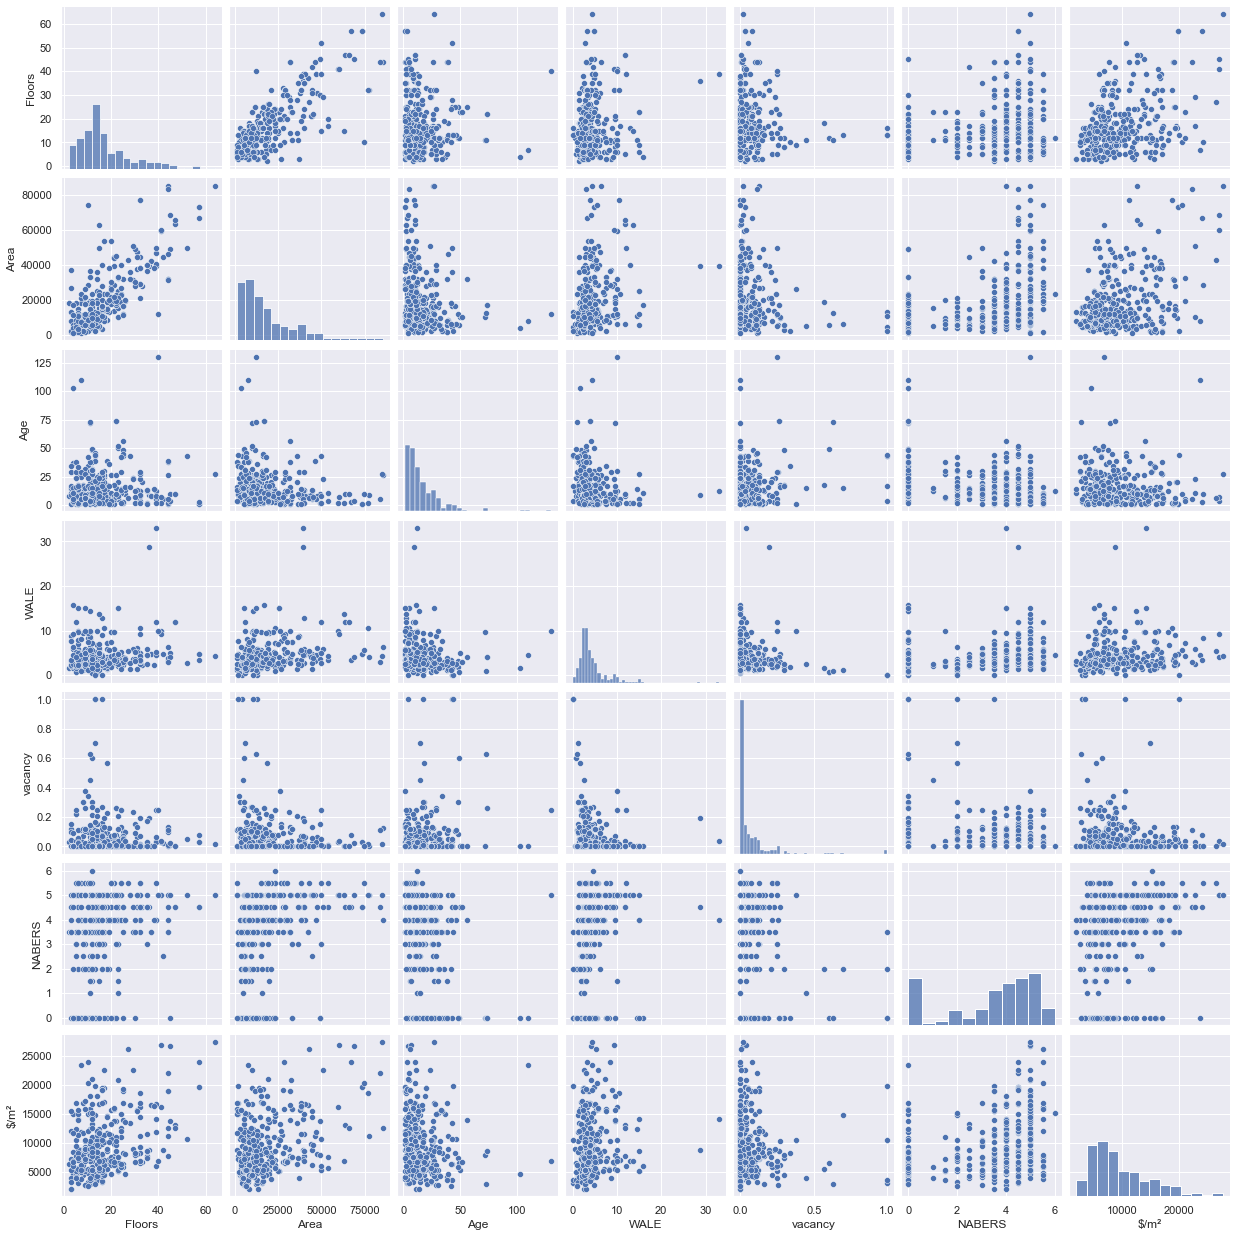

In [42]:
#scatterplot
sns.set()
cols = ['Floors', 'Area', 'Age', 'WALE', 'vacancy', 'NABERS', '$/m²']
sns.pairplot(df[cols], height = 2.5)
plt.show()

some vars need transformation

array([[<AxesSubplot:title={'center':'Floors'}>,
        <AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'WALE'}>,
        <AxesSubplot:title={'center':'vacancy'}>,
        <AxesSubplot:title={'center':'NABERS'}>],
       [<AxesSubplot:title={'center':'$/m²'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

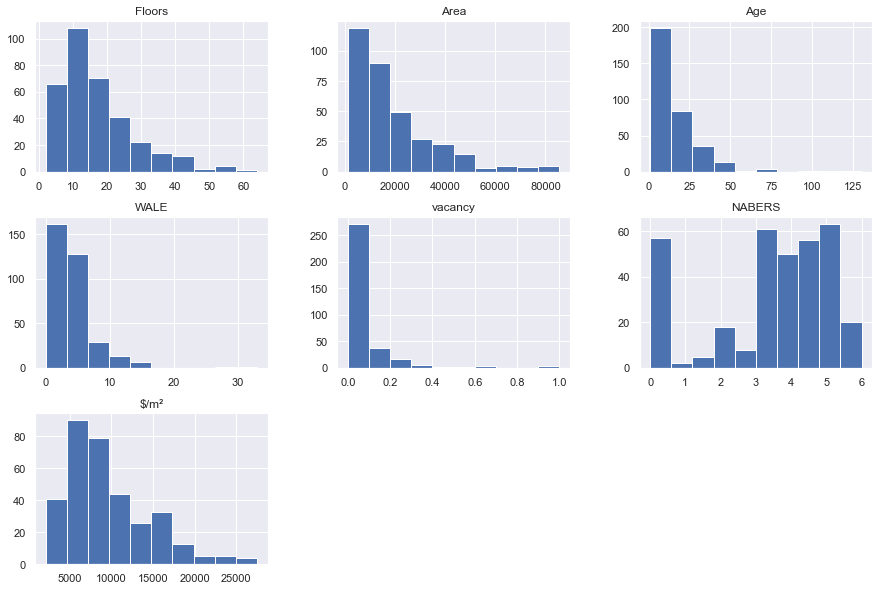

In [43]:
df[cols].hist(figsize=(15, 10))

In [44]:
#(df.sort_values(by=['Occupancy'])).head(50)

- we need to log transform most of the vars
- Occupancy/ vacancy - can't find the right functional form
- Adding a small amount to zero WALEs made the distribution resemble normal

In [45]:
df['WALE_transf'] = df['WALE'].replace(0, 0.3)
#df['Occupancy_transf'] = df['Occupancy'].replace(0, 0.01)

In [46]:
cols2 = ['Floors', 'Area', 'Age', 'WALE_transf', '$/m²']

# take logarithms of vars
logged_vars = np.log(df[cols2])
#add prefix to var names
logged_vars = logged_vars.add_prefix('ln_')

array([[<AxesSubplot:title={'center':'ln_Floors'}>,
        <AxesSubplot:title={'center':'ln_Area'}>],
       [<AxesSubplot:title={'center':'ln_Age'}>,
        <AxesSubplot:title={'center':'ln_WALE_transf'}>],
       [<AxesSubplot:title={'center':'ln_$/m²'}>, <AxesSubplot:>]],
      dtype=object)

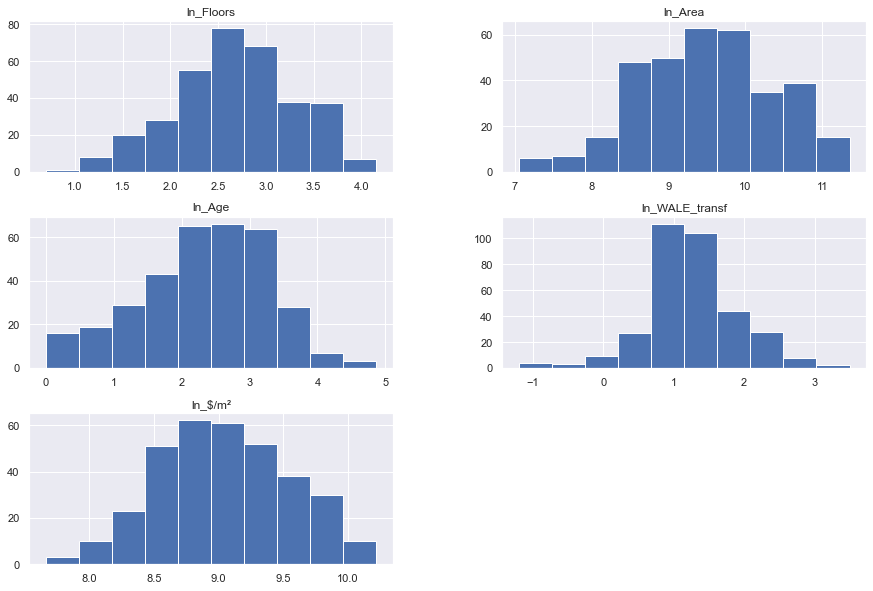

In [47]:
logged_vars.hist(figsize=(15, 10))

In [48]:
# add logged vars back to the dataset
df = pd.concat([df, logged_vars], axis=1)

#### Visualising categorical vars

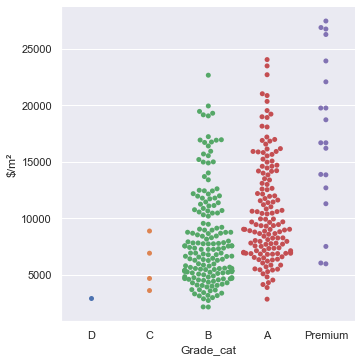

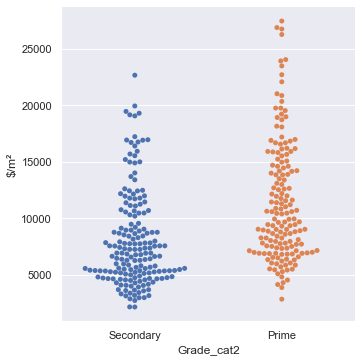

In [49]:
sns.catplot(x="Grade_cat", y="$/m²", kind="swarm", data=df)
sns.catplot(x="Grade_cat2", y="$/m²", kind="swarm", data=df)

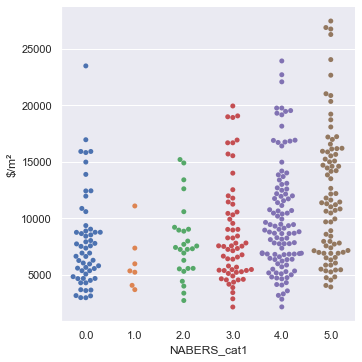

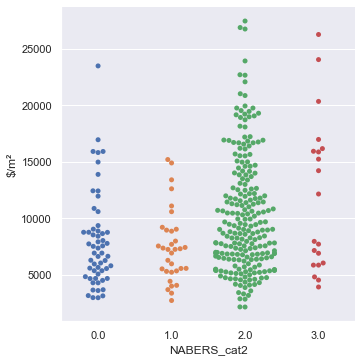

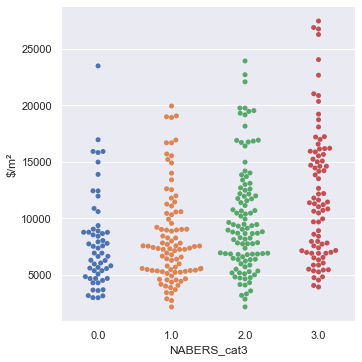

In [50]:
sns.catplot(x="NABERS_cat1", y="$/m²", kind="swarm", data=df)
sns.catplot(x="NABERS_cat2", y="$/m²", kind="swarm", data=df)
sns.catplot(x="NABERS_cat3", y="$/m²", kind="swarm", data=df)

[Text(0, 0, 'Fringe'),
 Text(1, 0, 'Melbourne CBD'),
 Text(2, 0, 'North Shore'),
 Text(3, 0, 'Parramatta'),
 Text(4, 0, 'Suburban'),
 Text(5, 0, 'Sydney CBD')]

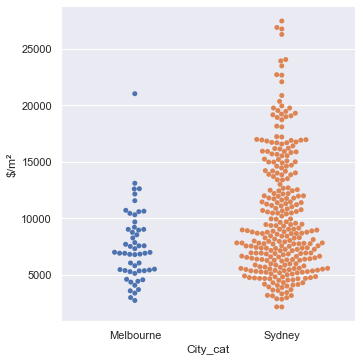

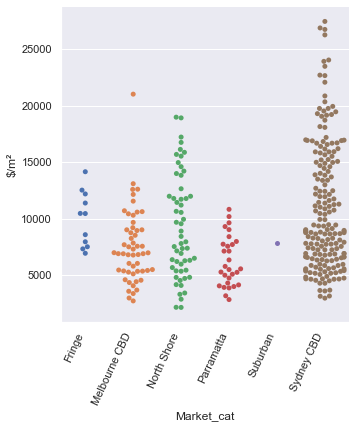

In [51]:
sns.catplot(x="City_cat", y="$/m²", kind="swarm", data=df)

ax = sns.catplot(x="Market_cat", y="$/m²", kind="swarm", data=df)
for axes in ax.axes.flat: axes.set_xticklabels(axes.get_xticklabels(), rotation=65, horizontalalignment='right')

In [52]:
df.dtypes

ID                     int32
Grade                 object
Prime/Secondary       object
Sold (%)             float64
Sale Date             object
Address               object
City                  object
Suburb                object
Market                object
Postcode               int64
States                object
Price                float64
Area                 float64
$/m²                 float64
WALE                 float64
Occupancy            float64
NABERS               float64
Floors                 int64
Year Built             int64
Year refurbished     float64
Address_scrape        object
lat                  float64
long                 float64
Sale Year              int64
Age                  float64
Grade_cat           category
Grade_cat2          category
City_cat            category
Market_cat          category
NABERS_cat1         category
NABERS_cat2         category
NABERS_cat3         category
vacancy              float64
WALE_transf          float64
ln_Floors     

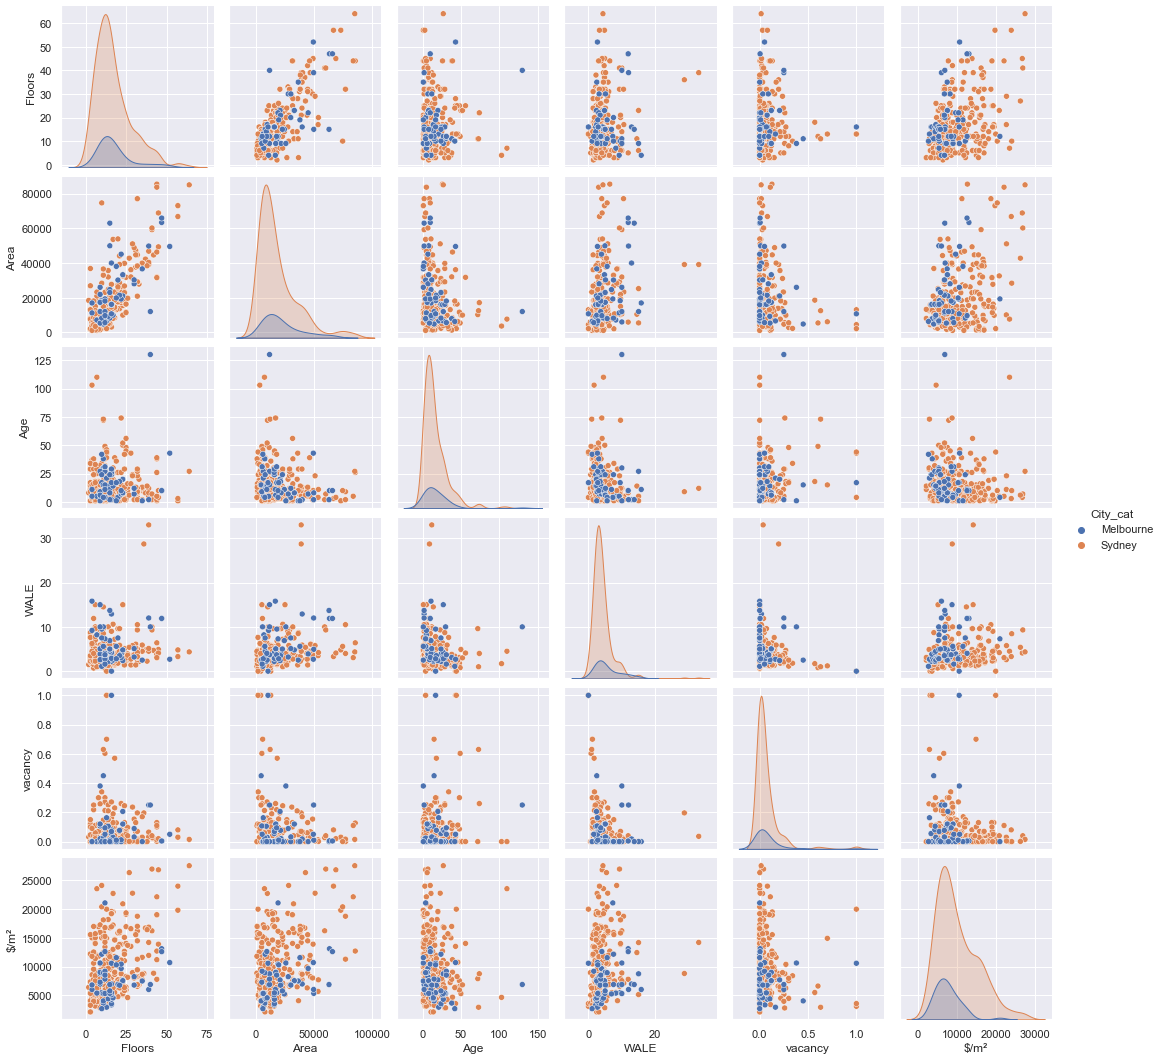

In [53]:
df_for_pairplots = df[['Floors', 'Area', 'Age', 'WALE', 'vacancy', 'City_cat', '$/m²']]
sns.pairplot(df_for_pairplots, hue='City_cat')

### Estimation

In [54]:
from statsmodels.tsa import stattools
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [55]:
df = df.rename(columns={'ln_$/m²': 'ln_price_psm'})

In [66]:
hedonic_model = sm.OLS.from_formula(formula='ln_price_psm ~ ln_Floors +ln_Area + ln_Age + Grade_cat2 + NABERS_cat3 + City_cat + ln_WALE_transf + Market_cat' 
                                    ,data = df).fit()
print(hedonic_model.summary())

                            OLS Regression Results                            
Dep. Variable:           ln_price_psm   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     13.81
Date:                Wed, 21 Jul 2021   Prob (F-statistic):           1.81e-24
Time:                        22:36:31   Log-Likelihood:                -180.00
No. Observations:                 340   AIC:                             388.0
Df Residuals:                     326   BIC:                             441.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [58]:
y = df['ln_price_psm'].values

In [59]:
X = df[['ln_Floors', 'ln_Area', 'ln_Age']].values

In [60]:
X = sm.add_constant(X)

In [61]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     19.50
Date:                Wed, 21 Jul 2021   Prob (F-statistic):           1.12e-11
Time:                        21:56:50   Log-Likelihood:                -227.29
No. Observations:                 340   AIC:                             462.6
Df Residuals:                     336   BIC:                             477.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4235      0.335     25.128      0.0